<a href="https://colab.research.google.com/github/WenxiGu/text-mining/blob/main/1_TecnicasNLP_master_profesor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Técnicas Básicas de NLP en el Text Mining

En el ámbito del Text Mining (TM) y el Procesamiento del Lenguaje Natural (NLP), es común utilizar tanto librerías generales de Data Mining, como scikit-learn o TensorFlow, como también herramientas especializadas diseñadas específicamente para trabajar con texto.

Estas librerías específicas permiten realizar tareas clave como el preprocesamiento de texto, la transformación de texto en vectores numéricos, y la implementación de modelos de NLP en producción.

En este notebook, presentaremos dos librerías populares para el trabajo con texto, explorando algunas de sus funcionalidades principales y aplicando técnicas básicas de procesamiento del lenguaje natural utilizando dichas herramientas.

En primer lugar, instalaremos os las librerías de programación que utilizaremos en este notebook:
- [**NLTK**](https://www.nltk.org//): NLTK es una de las librerías principales para trabajar con textos que fue creada por la Universidad de Pennsylvania en el año 2001. Aunque su uso principal ha estado unido  a entornos de investigación y educación, las facilidades en su uso y sus características la convierten en una de las librerías con un mayor número de recursos de aprendizaje como libros, foros o tutoriales. Contiene una gran cantidad de conjuntos de datos típicos para el aprendizaje de NLP y es muy utilizada en tareas para el preprocesado de texto antes de introducirlo en algoritmos de Inteligencia Artificial.

  Sólo lo utilizaremos en este tutorial para mostrar como tokenizar y mostrar los stopwords.

In [2]:
# Instalamos nltk
!pip install nltk
# Importamos
import nltk
# Complementos de la librería necesarios para su funcionamiento.
# Todas las opciones aquí https://www.nltk.org/nltk_data/
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

- [**Spacy**](https://spacy.io/): A diferencia de NLTK, que surgió y fue diseñada para ser utilizada en entornos de investigación, Spacy se centra en proporcionar herramientas que puedan ser incorporadas en entornos de producción con facilidad. De hecho, su fácil interconexión con otras librerías del mundo de la ciencia de datos, junto a la incorporación de modelos pre-entrenados y su facilidad para trabajar con múltiples idiomas, la han convertido en una de las librarías más usadas  en la actualidad.

    Para utilizarla, descargamos la librería y los modelos pre-entretados *en_core_web_sm* y *es_core_web_sm*, modelos de preprocesado de texto en inglés y español respectivamente.


In [3]:
# Instalamos textacy
!pip install textacy
# Instalamos spacy y uno de sus modelos
!pip install spacy
# Descargamos modelos pre-entrenados de spacy.
!python -m spacy download en_core_web_sm
!python -m spacy download es_core_news_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.6/321.6 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 94.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 99.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Re

Descargamos el conjunto de datos con el que trabajaremos en este notebook:

In [4]:
# Descargamos datos del repositorio de github
!wget "https://github.com/luisgasco/ntic_master_datos/raw/main/datasets/datos_twitter_master.tsv"

--2025-11-17 22:52:55--  https://github.com/luisgasco/ntic_master_datos/raw/main/datasets/datos_twitter_master.tsv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/datos_twitter_master.tsv [following]
--2025-11-17 22:52:55--  https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/datos_twitter_master.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113587 (111K) [text/plain]
Saving to: ‘datos_twitter_master.tsv’

datos_twitter_maste 100%[===================>] 110.92K  --.-KB/s    in 0.02s   

2025-11-17 22:52:55 (5.18 MB/s) - ‘dato

In [5]:
# Librerías tpipicas
import pandas as pd


## Corpus y corpora



Todo proceso de análisis textual comienza con un conjunto de documentos, comúnmente denominado **corpus** (o *corpora*, en plural). Un corpus suele estar compuesto por texto en bruto y, en algunos casos, incluye metadatos adicionales, aunque esto no es un requisito.

En este notebook trabajaremos con un corpus compuesto por mensajes publicados en la red social **Twitter**. Este conjunto de datos ya viene anotado y se encuentra distribuido en formato TSV (valores separados por tabulaciones).


En primer lugar lo leeremos de la ruta donde se ha descargado `/content/datos_twitter_master.tsv`:


In [6]:
tweets_df = pd.read_csv('/content/datos_twitter_master.tsv', sep = "\t")
tweets_df.head(3)

,tweet_text,molestia
0,Noise harassment is a sensation pain based tor...,1
1,It's 4.30am and we still haven't slept because...,1
2,These birds acting like I can't grab my chains...,1


El dataset está compuesto por un conjunto de filas, donde **cada fila representa un documento**. A cada documento pueden asociarse uno o varios metadatos, como por ejemplo el autor, la fecha de publicación, el idioma, o etiquetas anotadas manualmente.

En nuestro caso, el corpus contiene únicamente una columna de metadatos llamada `molestia`, que podría indicar una categoría o anotación del contenido. Sin embargo, en otros corpus podríamos encontrar muchos más atributos.

El contenido textual de los documentos puede descomponerse en **párrafos**, **frases** o **palabras**, dependiendo del tipo de análisis que se quiera realizar. Dado que en este caso los documentos son mensajes breves (tweets), trabajaremos directamente con el texto completo de cada documento.


En primer lugar, vamos a mirar el número de tweets que contiene nuestro corpus:

In [7]:
print("El corpus news_summary contiene un total de {} documentos".format(tweets_df.shape[0]))

El corpus news_summary contiene un total de 1020 documentos


## Tokenización

El texto bruto está compuesto por una secuencia de caracteres. Antes de su análisis los textos son divididos en fragmentos más pequeños conocidos como tokens. Un token puede ser tanto una palabra, como un símbolo de puntuación, un número o un emoticono, en el caso de estar analizando datos de redes sociales.

El proceso de división del texto en tokens se llama tokenización. A continuación, veremos cómo realizar la tokenización de un único documento del corpus utilizando dos librerías muy utilizadas en NLP: spaCy y NLTK.

Para los ejemplos trabajaremos con el tweet 5 del corpus (índice 4):

In [8]:
documento_4 = tweets_df.tweet_text.iloc[4]

##### ***NLTK***

La función de tokenización estándar de NLTK se llama word_tokenize. Podemos ver más información dentro de la web de documentación de NLTK (dentro del módulo word_tokenize [texto del enlace](https://www.nltk.org/api/nltk.tokenize.html))


También podemos utilizar la línea de código `?libreria.modulo.funcion` para que nos aparezca la ayuda de la función en la parte derecha de la pantalla.

In [9]:
?nltk.tokenize.word_tokenize

En primer lugar, segmentaremos el documento en frases utilizando la función `sent_tokenize()`:

In [10]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
# Seleccionamos el documento 5 del corpus
print(f"Documento: {documento_4}")
# Segmentar las frases de la noticia 5 (indice 4)
sentences = sent_tokenize(documento_4)
for num,sentence in enumerate(sentences):
    print('La oración número {} es: \n {}'.format(num, sentence))

Documento: Please would you keep the noise down? We're rehearsing in Dartington 🎻 @torbayairshow https://t.co/9ixrtuZHGK
La oración número 0 es: 
 Please would you keep the noise down?
La oración número 1 es: 
 We're rehearsing in Dartington 🎻 @torbayairshow https://t.co/9ixrtuZHGK


Podemos segmentar todos los tokens de un documento de forma global, sin segmentar por oraciones previamente utilizando `word_tokenize()`:

In [11]:
# Segmentar los tokens de la noticia 5 (indice 4)
tokens = word_tokenize(tweets_df.tweet_text.iloc[4])
for num,token in enumerate(tokens):
    print('El token {} es {} '.format(num,token))

El token 0 es Please 
El token 1 es would 
El token 2 es you 
El token 3 es keep 
El token 4 es the 
El token 5 es noise 
El token 6 es down 
El token 7 es ? 
El token 8 es We 
El token 9 es 're 
El token 10 es rehearsing 
El token 11 es in 
El token 12 es Dartington 
El token 13 es 🎻 
El token 14 es @ 
El token 15 es torbayairshow 
El token 16 es https 
El token 17 es : 
El token 18 es //t.co/9ixrtuZHGK 


Observamos que la función `word_tokenize()` **no maneja correctamente algunos caracteres especiales presentes en los tweets, como emojis, menciones, hashtags o URLs.**

Para este tipo de textos, NLTK ofrece una herramienta especializada llamada `TweetTokenizer()`, diseñada específicamente para procesar el lenguaje informal y los elementos característicos de plataformas como Twitter.

In [12]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()
tokens = tweet_tokenizer.tokenize(tweets_df.tweet_text.iloc[4])
for num,token in enumerate(tokens):
    print('El token {} es {} '.format(num,token))

El token 0 es Please 
El token 1 es would 
El token 2 es you 
El token 3 es keep 
El token 4 es the 
El token 5 es noise 
El token 6 es down 
El token 7 es ? 
El token 8 es We're 
El token 9 es rehearsing 
El token 10 es in 
El token 11 es Dartington 
El token 12 es 🎻 
El token 13 es @torbayairshow 
El token 14 es https://t.co/9ixrtuZHGK 


##### ***Spacy***

En Spacy el funcionamiento es algo distinto:
En primer lugar es necesario cargar un objeto spacy pre-entrenado proporcionado por los creadores de la librería (o por cualquier otro usuario que lo haya compartido).

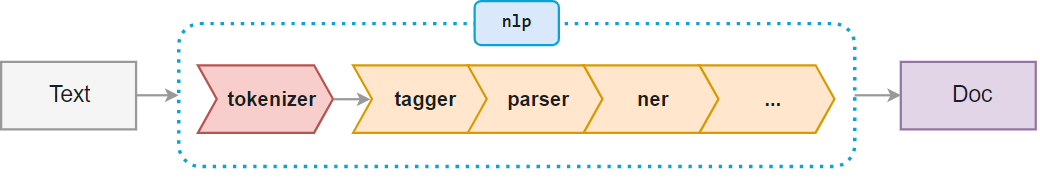
Los modelos incorporados con Spacy se pueden encontrar en su[ web](https://spacy.io/usage/facts-figures#benchmarks). Estos objetos permiten procesar documentos completos y acceder a diferentes niveles de análisis como los tokens, PoS, o lemmas.


En primer lugar cargamos el modelo:

spaCy 是一个工业级 NLP 库。给它一段文本，它按“流水线（pipeline）”依次处理，最后返回一个结构化对象 Doc，里面已经算好了分词、词性、依存、命名实体等。

流水线（对应你图）

Text → tokenizer → tagger → parser → ner → … → Doc

tokenizer：分词，把文本切成 token（词/标点）。

tagger：词性标注（POS），如 NOUN、VERB。

parser：依存句法，谁修饰谁、主谓宾关系（token.dep_）。

ner：命名实体识别（人名、地名、组织等）。

…：你还能插入/移除自定义组件（如正则清洗、规则匹配）。

这些都由一个 nlp 对象（模型 + 流水线配置）统一管理。你图里的 nlp 就是这个。

In [13]:
import spacy
# Cargamos el modelo preentrenado con textos en inglés
nlp=spacy.load('en_core_web_sm' )

A continuación, vamos a coger el mismo subset de noticias y vamos a aplicar el objeto nlp creado anteriormente a cada uno de los documentos

In [14]:
# Obtener una lista de objetos de tipo spacy procesados por spacy
documento_4 = nlp(documento_4)

Esto devuelve un objeto de tipo `Doc` representa una secuencia procesada de texto que contiene múltiples capas de anotación lingüística. Este objeto es fundamental dentro del framework de spaCy, ya que encapsula toda la información derivada del texto procesado como sus tokens, e información relativa a estos.

In [15]:
type(documento_4)

spacy.tokens.doc.Doc

Una vez procesado, se puede obtener el número de tokens del documente simplemente usando la función `len()` dobre el objeto `Doc`.

In [16]:
len(documento_4)

16

Para calcular el número de tokens de cada uno de los docmentos del corpus, podemos procesar con Spacy todos los documentos de nuestro corpus,  y posteriormente aplicar la función len() a cada objeto generado:

In [17]:
tweets_df["doc_spacy"] = tweets_df.tweet_text.apply(lambda x: nlp(x.lower()))
tweets_df["num_tokens"] = tweets_df.doc_spacy.map(len)

El objeto docs tiene diferentes atributos y métodos útiles. Por ejemplo, podemos acceder a cada una de las frases dle documento:

In [18]:
# Segmentamos el texto de la noticia 4 en oraciones:
for num,sentence in enumerate(documento_4.sents):
    print('La oración número {} es: \n {}'.format(num, sentence))

La oración número 0 es: 
 Please would you keep the noise down?
La oración número 1 es: 
 We're rehearsing in Dartington 🎻 @torbayairshow https://t.co/9ixrtuZHGK


Así como mostrar los tokens de cada una de las frases.


In [19]:
# Además también podemos dividir cada frase en tokens para la noticia 4:
for num,sentence in enumerate(documento_4.sents):
    print('La oración {} tiene {} tokens'.format(num, len(sentence)))
    tokens=[word for word in sentence]
    print(tokens)

La oración 0 tiene 8 tokens
[Please, would, you, keep, the, noise, down, ?]
La oración 1 tiene 8 tokens
[We, 're, rehearsing, in, Dartington, 🎻, @torbayairshow, https://t.co/9ixrtuZHGK]


### Visualización número de tokens en un corpus

Con la información que hemos obtenido hasta ahora, ya podemos realizar una primera visualización para **estudiar el contenido de nuestros documentos**.

Una forma sencilla de comenzar es **comparando la longitud (en número de tokens)** de los textos según la categoría a la que pertenecen. Esto nos puede ayudar a identificar patrones o diferencias generales entre clases.

Por ejemplo, podemos analizar cómo varía la longitud de los textos según la etiqueta presente en la columna `molestia`.

<Figure size 1400x1200 with 0 Axes>

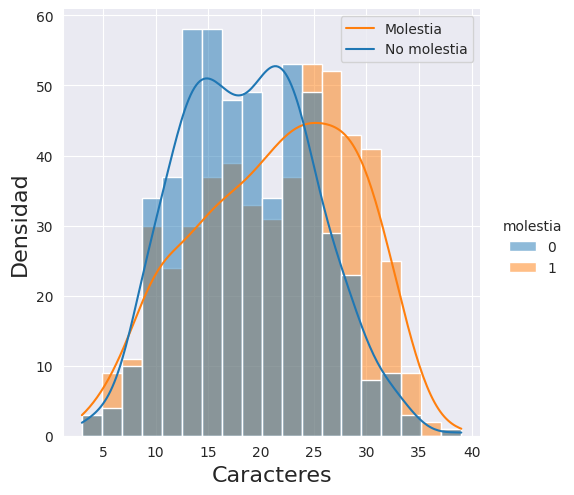

In [20]:
# Importamos las librerías matplotlib y seaborn:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(14,12))
sns.set_style("darkgrid")

sns.displot(data=tweets_df, x="num_tokens", hue="molestia", kde=True, legend=True)
plt.legend(["Molestia", "No molestia"])
# Definimos el título de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

# Finalmente mostramos el gráfico:
plt.show()



## Unigramas, Bigramas y N-gramas

Los n-gramas son secuencias de n tokens consecutivos provenientes de un texto. La combinación de n-gramas puede proporcionar información sobre la temática de un texto. Generalmente se generan unigramas, que son iguales que los tokens del texto. Los Bigramas, que son combinaciones pareadas de tokens y los trigramas que son triadas de tokens.

Este tipo de análisis resulta muy útil en tareas exploratorias, ya que permite identificar términos frecuentes y patrones temáticos de manera sencilla.

> ⚠️ Nota: _spaCy_ no incluye actualmente una funcionalidad integrada para extraer n-gramas. Para ello, utilizaremos una librería complementaria compatible con spaCy llamada textacy.


🧩 什么是 n-grams

n-grams 是指：

文本中由连续 n 个单词（token）组成的序列。

比如句子：

“El gato negro duerme.”

Unigram（一元语法）：每个单词单独看
→ ["El", "gato", "negro", "duerme"]

Bigram（二元语法）：每两个相邻词组成组合
→ [("El gato"), ("gato negro"), ("negro duerme")]

Trigram（三元语法）：每三个相邻词
→ [("El gato negro"), ("gato negro duerme")]

💡 为什么要用 n-grams

n-grams 可以揭示 词与词之间的共现关系，从而帮助模型理解：

文本主题（thematic patterns）

常见搭配（collocations）

特定语境下的习惯用语（如 “machine learning”）

在探索性分析（exploratory analysis）中，统计高频 n-grams 常用于：

找主题关键词；

理解文本语气和重点；

改善特征提取（feature engineering）效果。

Utilizaremos la librería textacy para extraer esta información:

In [21]:
import textacy

In [22]:
 # Calculamos los bigramas, trigramas y 4 gramas de la noticia 4
print("Bigramas: ", list(textacy.extract.ngrams(documento_4,2, min_freq=1, filter_stops = False, filter_punct =False)))
print("Trigramas: ", list(textacy.extract.ngrams(documento_4,3, min_freq=1, filter_stops = False, filter_punct =False)))
print("4-gramas: ", list(textacy.extract.ngrams(documento_4,4, min_freq=1, filter_stops = False, filter_punct =False)))


Bigramas:  [Please would, would you, you keep, keep the, the noise, noise down, down?, ? We, We're, 're rehearsing, rehearsing in, in Dartington, Dartington 🎻, 🎻 @torbayairshow, @torbayairshow https://t.co/9ixrtuZHGK]
Trigramas:  [Please would you, would you keep, you keep the, keep the noise, the noise down, noise down?, down? We, ? We're, We're rehearsing, 're rehearsing in, rehearsing in Dartington, in Dartington 🎻, Dartington 🎻 @torbayairshow, 🎻 @torbayairshow https://t.co/9ixrtuZHGK]
4-gramas:  [Please would you keep, would you keep the, you keep the noise, keep the noise down, the noise down?, noise down? We, down? We're, ? We're rehearsing, We're rehearsing in, 're rehearsing in Dartington, rehearsing in Dartington 🎻, in Dartington 🎻 @torbayairshow, Dartington 🎻 @torbayairshow https://t.co/9ixrtuZHGK]


Este análisis nos permite observar cómo un documento puede ser descompuesto en fragmentos de tokens consecutivos, lo cual podría identificar patrones, frases repetidas o temáticas relevantes de forma más precisa que analizando palabras individuales.

Vamos a ver esto llevando a cabo un análisis de los tokens, bigramas y trigramas más utilizados en el corpus.

Definimos una función para extraer y contabilizar los ngramas de una lista de documentos, previamente procesados por Spacy:

In [23]:
from collections import Counter

def extract_and_count_ngrams(docs, n):
   all_ngrams = []
   for doc in docs:
      # Obtenemos los ngrams del documento
      ngrams = list(textacy.extract.ngrams(doc, n, min_freq=1, filter_stops=False, filter_punct=False))
      # Convertimos el Span (los elementos del objeto Doc) a texto (string)
      all_ngrams.extend([" ".join([token.text for token in ng]) for ng in ngrams])
   return Counter(all_ngrams)

unigramas_total = extract_and_count_ngrams(tweets_df["doc_spacy"].to_list(),1)
bigramas_total = extract_and_count_ngrams(tweets_df["doc_spacy"].to_list(),2)
trigramas_total = extract_and_count_ngrams(tweets_df["doc_spacy"].to_list(),3)

Generamos una función para visualizar el top n-grams:

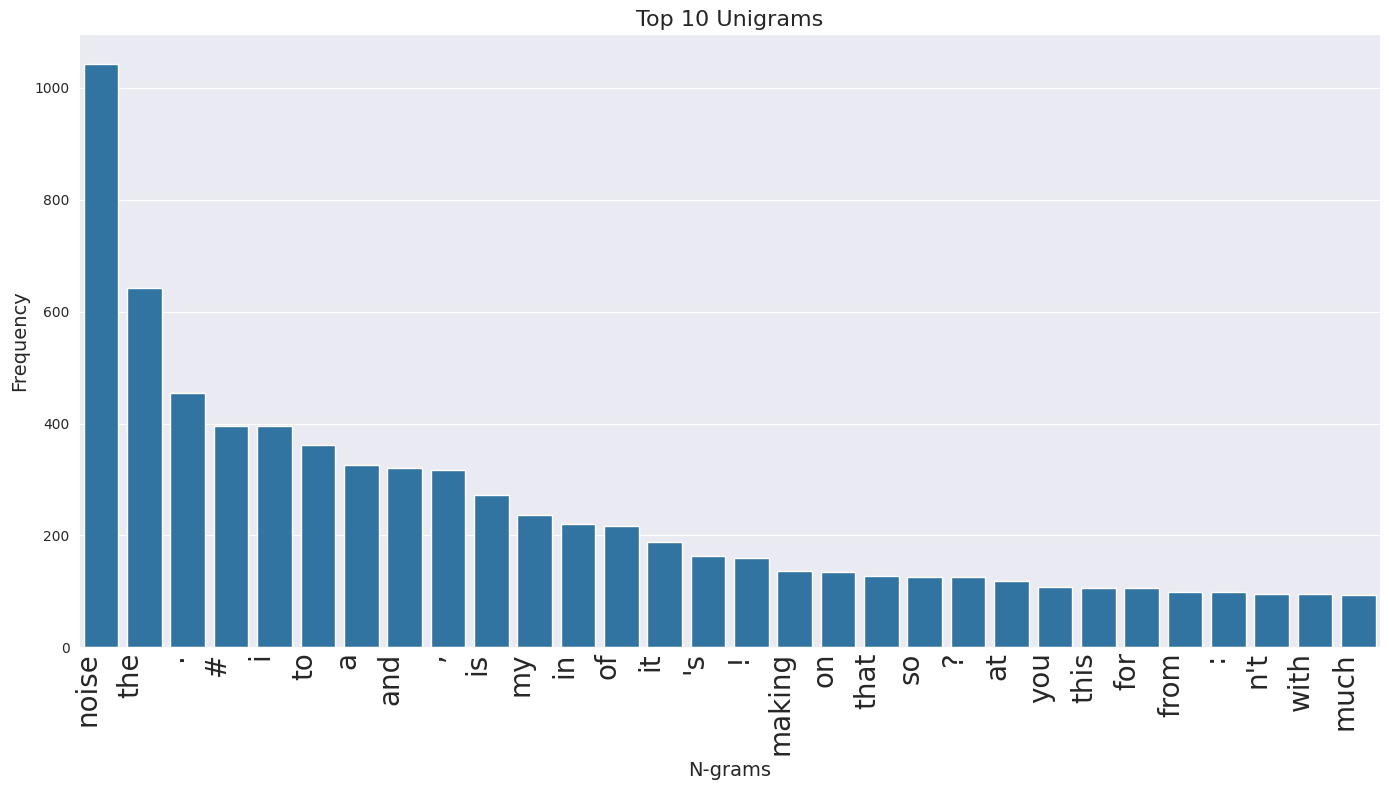

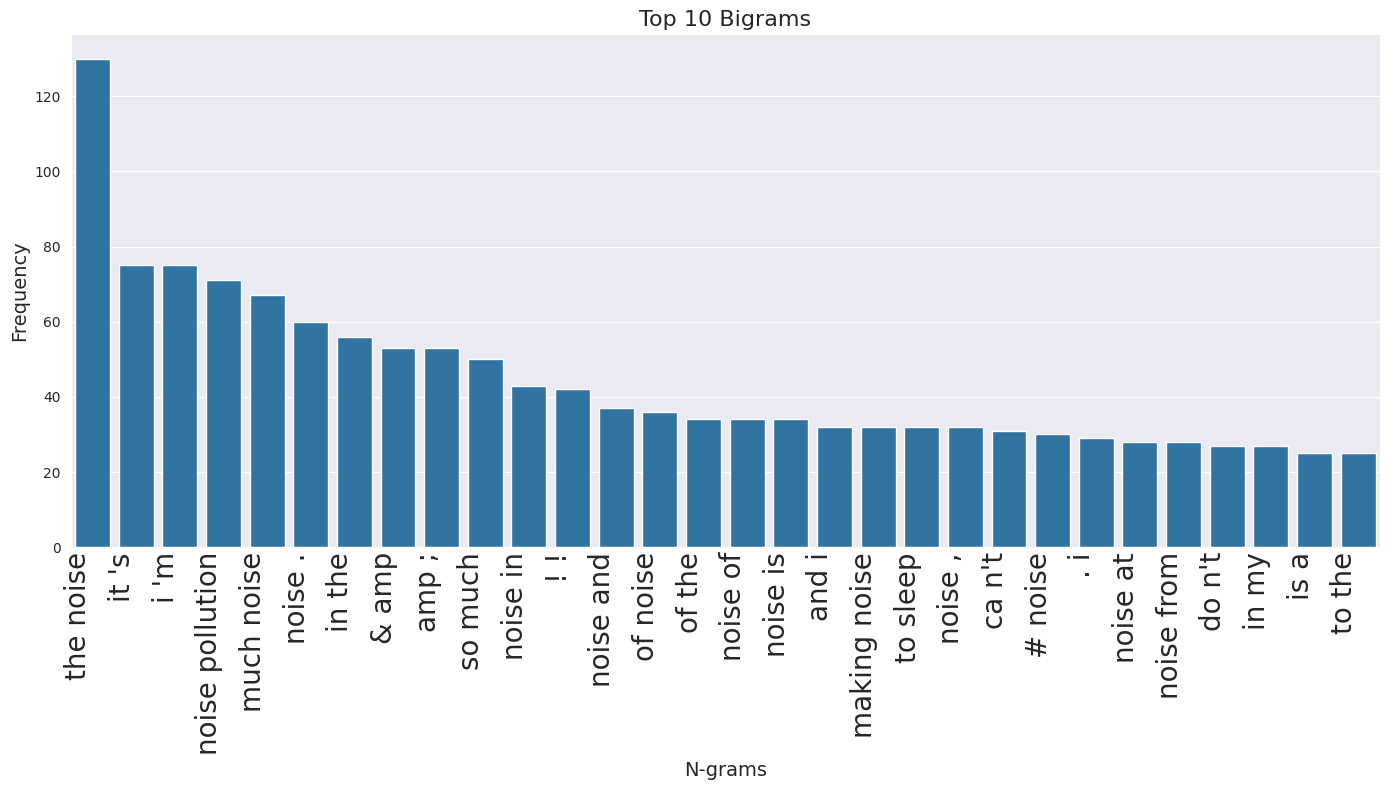

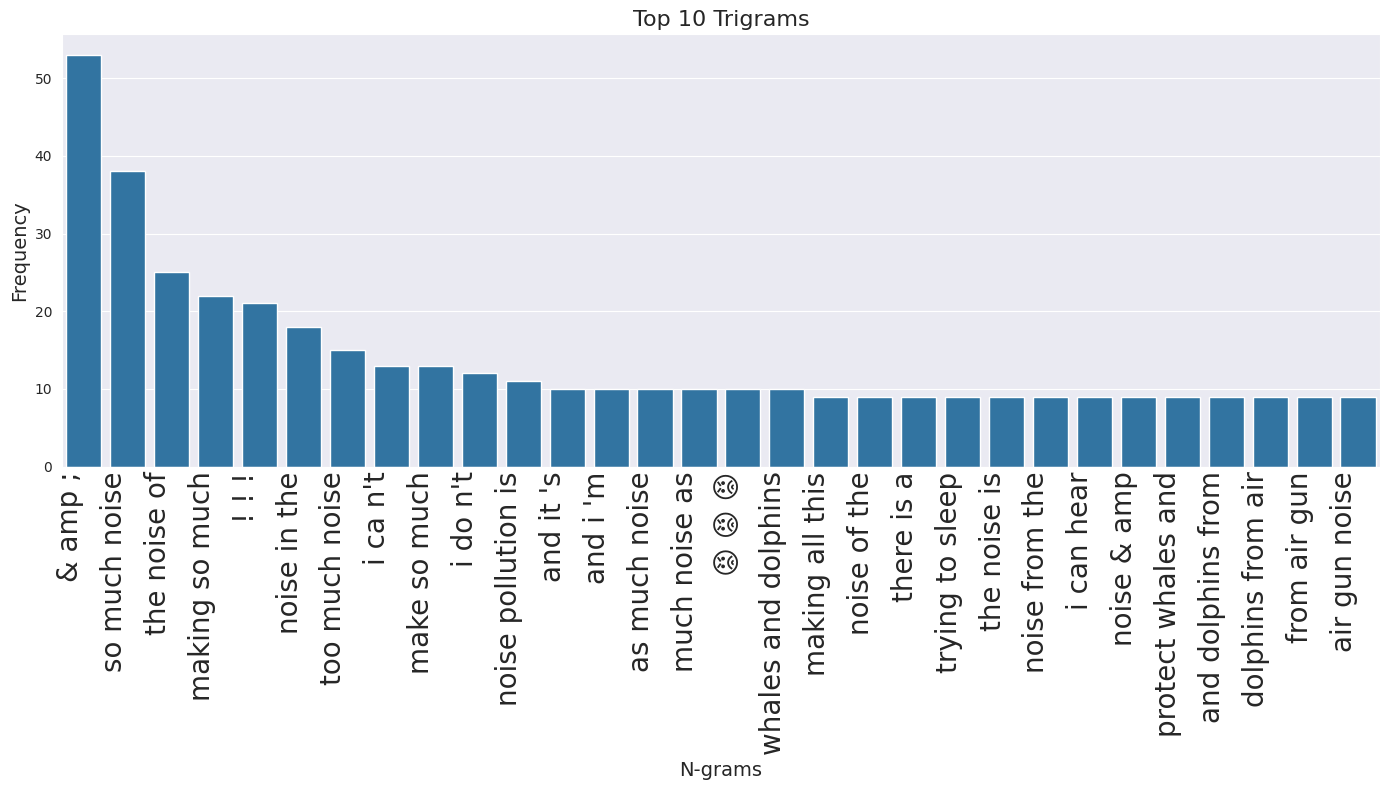

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_top_ngrams(ngram_counts, top_n=30, title="Top N-grams"):
    """Visualizes the top N n-grams using a bar plot.

    Args:
        ngram_counts (Counter): A Counter object containing n-gram counts.
        top_n (int): The number of top n-grams to display.
        title (str): The title of the plot.
    """
    top_ngrams = ngram_counts.most_common(top_n)
    x_names = [ngram for ngram, count in top_ngrams]
    y_values = [count for ngram, count in top_ngrams]

    plt.figure(figsize=(14, 8))
    sns.set_style("darkgrid")

    ax = sns.barplot(x=x_names, y=y_values)
    plt.xticks(rotation=90, ha='right', fontsize=20)
    plt.xlabel("N-grams", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.title(title, fontsize=16)
    ax.tick_params(axis='x', which='both', length=0)

    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()


visualize_top_ngrams(unigramas_total, title="Top 10 Unigrams")
visualize_top_ngrams(bigramas_total, title="Top 10 Bigrams")
visualize_top_ngrams(trigramas_total, title="Top 10 Trigrams")


Al observar la gráfica de unigramas, se puede notar la presencia de muchos términos altamente frecuentes que **no aportan información semántica relevant**e, **como símbolos de puntuación** o **palabras vacías** (por ejemplo, the, a, of, etc.). Estas palabras son comunes en cualquier texto, pero no nos ayudan a comprender su contenido. También aparecen muchos vervos auxiliares conjugados, muy específicos para entender el contenido del texto.  Estos elementos tan frecuentes, que no aportan información semántica se podrían eliminar.
```
import string
from nltk.corpus import stopwords
punctuations = string.punctuation
stop_words = stopwords.words('english')
```

Además, las conjugaciones o plurales pueden ser normalizados utilizando técnicas de lematización, como veremos más adelante.



Por otra parte, si analizamos las gráficas de bigramas y trigramas, comenzamos a ver combinaciones de palabras que sí nos dan más pistas sobre la temática de los documentos. El unigrama "noise" por sí solo es ambiguo y podría referirse a distintos tipos de ruido (ruido acústico, ruido mediático...). En cambio, en los bigramas y trigramas aparecen expresiones como "too much noise" o "keep the noise down", que sugieren con mayor claridad que los textos están relacionados con quejas sobre el ruido.

## Lematización


La lematización es el proceso de reducir una palabra a su forma canónica o base, conocida como lema. En el caso del español, por ejemplo, los verbos pueden presentar múltiples formas debido a la **flexión verbal** (conjugación), que varía en número, persona, tiempo verbal, etc.

Llevar las palabras a su lema es útil para **reducir la dimensionalidad** en tareas de análisis y modelado, ya que nos permite agrupar distintas formas de una misma palabra bajo una única representación semántica.

Este proceso se realiza mediante **diccionarios jerárquicos**, como *WordNet* (que tradicionalmente se utliizaba con la librería nltk), o bien mediante modelos estadísticos o de aprendizaje automático, como es el caso de **spaCy**, el que utlizaremos en el ejerciico.




Para lematizar en spaCy, una vez que el documento ha sido procesado con el objeto nlp, spaCy permite acceder fácilmente al lema de cada token a través del atributo .lemma_.

Cada token procesado en spaCy contiene este y muchos otros atributos lingüísticos. En este caso, podemos iterar sobre los tokens del documento y extraer sus lemas de la siguiente manera:

词形还原（lemmatization）：把单词还原到词典形式/基本形（lemma）。

西语里动词会随人称、时态、数变化，例如 “hablo, hablaste, hablaremos” → 统一成 “hablar”。

这样可以把同一词的不同形态合并，从而降维并稳定特征表示（模型更稳、统计更准）。

和 stemming 的区别

Stemming：粗暴截词，可能得到非词典词，如 “studies” → “studi”。

Lemmatization：基于词性与词法信息得出合法词形，如 “studies” → “study”；“mejores” → “mejor”。

In [25]:
for word in documento_4:
  print(word.text, "---->", word.lemma_)

Please ----> please
would ----> would
you ----> you
keep ----> keep
the ----> the
noise ----> noise
down ----> down
? ----> ?
We ----> we
're ----> be
rehearsing ----> rehearse
in ----> in
Dartington ----> Dartington
🎻 ----> 🎻
@torbayairshow ----> @torbayairshow
https://t.co/9ixrtuZHGK ----> https://t.co/9ixrtuZHGK


## Part-Of-Speech Tagging

El *Part-Of-Speech Tagging* o la asignación de categorías gramaticales a una frase es el proceso en el que a una lista de palabras es etiquetada con su categoría gramatical, es decir que identifica si la palabra es un nombre, un adjetivo, un verbo, un adverbio, etc.

La asignación de etiquetas gramaticales es interesante cuando se quiere hacer análisis gramatical de una oración, para saber si una palabra tiene una acepción u otra, o incluso para extraer características artificiales cuando se quiere hacer una clasificación textual o similar.


Part-of-Speech Tagging（词性标注） 是给句子里的每个单词打上语法类别标签的过程。
👉 例如判断一个词是：

名词（NOUN）

动词（VERB）

形容词（ADJ）

副词（ADV）

代词（PRON）

介词（ADP）

连词（CONJ）
等。

El listado de etiquetas POS utilizadas en Spacy es el siguiente:



```
SPACY_POS_LIST = ["ADJ", "ADP", "ADV", "AUX", "CONJ", "CCONJ",
                  "DET", "INTJ", "NOUN", "NUM", "PART", "PRON",
                  "PROPN", "PUNCT", "SCONJ", "SYM", "VERB", "X", "SPACE"]
```

Si se necesita recordar que significa una de las abreviaciones se puede utilizar el código:

```
spacy.explain("NN")
# 'noun, singular or mass'
```




In [26]:
spacy.explain("INTJ")

'interjection'

Del mismo modo que ocurría en la lematización, para obtener el *Part-of-Speech* sólo tenemos que iterar por los tokens del documento y acceder al atributo `pos_`.

In [27]:
# Cogemos un subset de las noticias para acelerar el proceso:

for w in documento_4:
    print( "The word '{}' is a {} ".format(w.text, w.pos_))

The word 'Please' is a INTJ 
The word 'would' is a AUX 
The word 'you' is a PRON 
The word 'keep' is a VERB 
The word 'the' is a DET 
The word 'noise' is a NOUN 
The word 'down' is a ADP 
The word '?' is a PUNCT 
The word 'We' is a PRON 
The word ''re' is a AUX 
The word 'rehearsing' is a VERB 
The word 'in' is a ADP 
The word 'Dartington' is a PROPN 
The word '🎻' is a PROPN 
The word '@torbayairshow' is a PROPN 
The word 'https://t.co/9ixrtuZHGK' is a PROPN 


## Named-entiy recognition

La extración de entidades de un documento es una labor esencial en la análitica de textos. En algunas ocasiones puede ser interesante si se nombra a una persona, a una ciudad, un país o incluso a un medicamento, en el caso de los textos clínicos.

Existen sistemas NER (Named-entity recognition) específicos en diversos campos de aplicación. Los modelos pre-entrenados de Spacy disponen de modelos para detectar entidades de ámbito general, aunque existen modelos mucho más espcificos para reconocer entidades muy específicos como por ejemplo síntomas en textos clinicos.

EAcceder a esta información en Spacy es sencillo. Cuando procesamos un documento con el modelo importado, automáticamente se le aplica un conjunto de instrucciones internamente para detectar tokens, lemas... y también las entidades nombradas, a las que se puede acceder iterando sobre el atributo `ents` y extrayendo la etiqueta.

🧩 什么是 Named-Entity Recognition (NER)

命名实体识别是指从文本中自动识别出具有特定意义的“命名对象”，例如：

👤 人名（PERSON）

🏙️ 地名 / 城市（GPE, LOC）

🏢 组织名（ORG）

📅 日期（DATE）

💰 金额（MONEY）

💊 药物 / 症状（在医学领域）

例如句子：

“Elon Musk fundó SpaceX en California en 2002.”
识别结果：
| 实体 | 类型 |
|-------|------|
| Elon Musk | PERSON |
| SpaceX | ORG |
| California | GPE |
| 2002 | DATE |

⚙️ 为什么要做 NER

提取关键信息：从非结构化文本中提取结构化内容（人名、公司、地点等）。

支持知识图谱、推荐系统、搜索引擎等应用。

领域分析：医学文本中提取药名、病症；法律文档中提取案件编号或法条。

In [28]:
# Segmentamos los tokens
tokens = nlp("John was born in Chicken, Alaska, and studies at Cranberry Lemon University. John likes to go to Starbucks.")
print([(X.text, X.label_) for X in tokens.ents])

[('John', 'PERSON'), ('Chicken', 'GPE'), ('Alaska', 'GPE'), ('Cranberry Lemon University', 'ORG'), ('John', 'PERSON'), ('Starbucks', 'ORG')]


Además, spacy incorpora un módulo para visualizar estas entidades en un gráfico.

In [29]:
from spacy import displacy
displacy.render(tokens, jupyter=True, style='ent')


In [30]:
displacy.render(documento_4, jupyter=True, style='ent')


## Estructura de la frase

In [31]:
from spacy import displacy
tokens = nlp("John was born in Chicken, Alaska, and studies at Cranberry Lemon University. John likes to go to Starbucks.")
displacy.render(tokens,style='dep',jupyter=True)

In [32]:
displacy.render(documento_4, jupyter=True, style='dep')
